In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import cufflinks as cf
%matplotlib inline 

from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer, OneHotEncoder, LabelEncoder 
from sklearn.pipeline import Pipeline


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import PrecisionRecallDisplay, roc_curve, average_precision_score, precision_recall_curve
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay


from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")

# OTOKLAV DATA REVIEW

## 2018

In [5]:
df0 = pd.read_csv("df_otoklav_18.csv")
df_otoklav_18 = df0.copy()

In [6]:
df_otoklav_18.head()

,DMO-ÖZEL-İHALE-DEMO,SİPARİŞ NO/İŞ EMRİ NO/TEKLİF NO,SİPARİŞ TARİHİ,SİPARİŞİ VEREN/2018,KURULUM YERİ /2018,İL,ÜRÜN MODELİ,ÜRÜN ADI,LİTRE,SERİ NO,TESLİM \r\nSÜRESİ,TESLİM TARİHİ
0,ÖZEL,2018/001,2018-01-04,YENİ HAYAT TIP MERKEZİ-ORJİN SAĞLIK HİZM.,YENİ HAYAT TIP MERKEZİ-ORJİN SAĞLIK HİZM.,İSTANBUL,STR 6610 D,422 LT ÇİFT KAPILI OTOKLAV CİHAZI,422 LİTRE,2018/01-001,30,NaN
1,DMO,2018/072,2017-12-28,DMO GENEL MÜDÜRLÜK,T.C. GIDA TARIM VE HAYV. BAKANLIĞI GIDA VE KON...,ANKARA,7717 S,2000 LT ÇİFT KAPILI LABARATUVAR TİP BUHAR STER...,2000 LİTRE,2018/01-002,100 GÜN,2018-04-06
2,ÖZEL,2018/071,2017-12-25,BURSA RETİNA GÖZ MERKEZİ,BURSA RETİNA GÖZ MERKEZİ,BURSA,ERS 4410 D,160 LT ÇİFT KAPILI OTOKLAV CİHAZI,160 LİTRE,2018/01-003,20,NaN
3,YURTDIŞI,2018/064,2018-01-22,BAHRİ GROUP CO.,BAHRİ GROUP CO.,KUZEY IRAK,STR 75 V,75 LT VAKUMLU OTOKLAV CİHAZI,75 LT,2018/01-004,20,NaN
4,DMO,2018/107,2018-01-29,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ,HUDUT VE SAHİLLER GENEL MÜDÜRLÜĞÜ DESTEK HİZME...,İSTANBUL,ERS 6613 D,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI,550 LT,2018/01-005,20,NaN


In [7]:
df_otoklav_18.shape

(140, 12)

In [8]:
df_otoklav_18.head().T

,0,1,2,3,4
DMO-ÖZEL-İHALE-DEMO,ÖZEL,DMO,ÖZEL,YURTDIŞI,DMO
SİPARİŞ NO/İŞ EMRİ NO/TEKLİF NO,2018/001,2018/072,2018/071,2018/064,2018/107
SİPARİŞ TARİHİ,2018-01-04,2017-12-28,2017-12-25,2018-01-22,2018-01-29
SİPARİŞİ VEREN/2018,YENİ HAYAT TIP MERKEZİ-ORJİN SAĞLIK HİZM.,DMO GENEL MÜDÜRLÜK,BURSA RETİNA GÖZ MERKEZİ,BAHRİ GROUP CO.,DMO İSTANBUL BÖLGE MÜDÜRLÜĞÜ
KURULUM YERİ /2018,YENİ HAYAT TIP MERKEZİ-ORJİN SAĞLIK HİZM.,T.C. GIDA TARIM VE HAYV. BAKANLIĞI GIDA VE KON...,BURSA RETİNA GÖZ MERKEZİ,BAHRİ GROUP CO.,HUDUT VE SAHİLLER GENEL MÜDÜRLÜĞÜ DESTEK HİZME...
İL,İSTANBUL,ANKARA,BURSA,KUZEY IRAK,İSTANBUL
ÜRÜN MODELİ,STR 6610 D,7717 S,ERS 4410 D,STR 75 V,ERS 6613 D
ÜRÜN ADI,422 LT ÇİFT KAPILI OTOKLAV CİHAZI,2000 LT ÇİFT KAPILI LABARATUVAR TİP BUHAR STER...,160 LT ÇİFT KAPILI OTOKLAV CİHAZI,75 LT VAKUMLU OTOKLAV CİHAZI,550 LT ÇİFT KAYAR KAPILI OTOKLAV CİHAZI
LİTRE,422 LİTRE,2000 LİTRE,160 LİTRE,75 LT,550 LT
SERİ NO,2018/01-001,2018/01-002,2018/01-003,2018/01-004,2018/01-005


In [9]:
df_otoklav_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DMO-ÖZEL-İHALE-DEMO              140 non-null    object
 1   SİPARİŞ NO/İŞ EMRİ NO/TEKLİF NO  140 non-null    object
 2   SİPARİŞ TARİHİ                   140 non-null    object
 3   SİPARİŞİ VEREN/2018              140 non-null    object
 4   KURULUM YERİ /2018               140 non-null    object
 5   İL                               140 non-null    object
 6   ÜRÜN MODELİ                      140 non-null    object
 7   ÜRÜN ADI                         140 non-null    object
 8   LİTRE                            140 non-null    object
 9   SERİ NO                          137 non-null    object
 10  TESLİM 
SÜRESİ                  140 non-null    object
 11  TESLİM TARİHİ                    1 non-null      object
dtypes: object(12)
memory usage: 13.3+ KB


In [10]:
# Basic statistics summary of Numerical features

df_otoklav_18.describe().T

,count,unique,top,freq
DMO-ÖZEL-İHALE-DEMO,140,4,YURTDIŞI,68
SİPARİŞ NO/İŞ EMRİ NO/TEKLİF NO,140,140,2018/001,1
SİPARİŞ TARİHİ,140,60,2018-09-19,46
SİPARİŞİ VEREN/2018,140,48,ETİYOPYA,46
KURULUM YERİ /2018,140,67,ETİYOPYA,46
İL,140,32,ETİYOPYA,46
ÜRÜN MODELİ,140,28,STR 75 V,47
ÜRÜN ADI,140,19,75 LT VAKUMLU OTOKLAV CİHAZI,53
LİTRE,140,13,75 LT,54
SERİ NO,137,137,2018/01-001,1


## User Defined Funcs for Summary of Data

In [22]:
############ Numeric Features Summary #########################

def numeric_summary(df):
    obs = df.shape[0]
    duplicate_count = df.duplicated().sum()
    missing_count = df.isnull().sum().sum()
    
    # Display df.shape, missing and duplicate count at the beginning
    print(f'Data shape (rows, columns): {df.shape}')
    print(f'Number of duplicate rows: {duplicate_count}')
    print(f'Number of missing values: {missing_count}')
    
    
    numeric_df = df.select_dtypes(include='number')
    summary_df = pd.DataFrame({
        'Dtype': numeric_df.dtypes, 
        'Counts': numeric_df.apply(lambda x: x.count()), 
        'Nulls': numeric_df.apply(lambda x: x.isnull().sum()), 
        'NullPercent': (numeric_df.isnull().sum() / obs) * 100,
        'Min': numeric_df.min(),
        'Max': numeric_df.max(),
        'Uniques': numeric_df.apply(lambda x: x.unique().shape[0]),
        'UniqueValues': numeric_df.apply(lambda x: list(x.unique()) if x.nunique() <= 10 else '-')
    })
    
    print('___________________________\nData Types:')
    print(summary_df['Dtype'].value_counts())
    print('___________________________')
    return summary_df


########## Categorical Features Summary ########################

def object_summary(df):
    obs = df.shape[0]
    duplicate_count = df.duplicated().sum()
    missing_count = df.isnull().sum().sum()
        
    # Display df.shape, missing and duplicate count at the beginning
    print(f'Data shape (rows, columns): {df.shape}')
    print(f'Number of duplicate rows: {duplicate_count}')
    print(f'Number of missing values: {missing_count}')
    
    object_df = df.select_dtypes(include='object')
    summary_df = pd.DataFrame({
        'Dtype': object_df.dtypes,
        'Counts': object_df.apply(lambda x: x.count()),
        'Nulls': object_df.apply(lambda x: x.isnull().sum()),
        'NullPercent': (object_df.isnull().sum() / obs) * 100,
        'Top': object_df.apply(lambda x: x.mode()[0] if not x.mode().empty else '-'),
        'Frequency': object_df.apply(lambda x: x.value_counts().max() if not x.value_counts().empty else '-'),
        'Uniques': object_df.apply(lambda x: x.unique().shape[0]),
        'UniqueValues': object_df.apply(lambda x: list(x.unique()) if x.nunique() <= 10 else '-')
    })
    
    print('___________________________\nData Types:')
    print(summary_df['Dtype'].value_counts())
    print('___________________________')
    return summary_df


In [26]:
numeric_summary(df_otoklav_18)

Data shape (rows, columns): (140, 12)
Number of duplicate rows: 0
Number of missing values: 142
___________________________
Data Types:
Series([], Name: count, dtype: int64)
___________________________


,Dtype,Counts,Nulls,NullPercent,Min,Max,Uniques,UniqueValues


In [25]:
object_summary(df_otoklav_18)

Data shape (rows, columns): (140, 12)
Number of duplicate rows: 0
Number of missing values: 142
___________________________
Data Types:
Dtype
object    12
Name: count, dtype: int64
___________________________


,Dtype,Counts,Nulls,NullPercent,Top,Frequency,Uniques,UniqueValues
DMO-ÖZEL-İHALE-DEMO,object,140,0,0.000000,YURTDIŞI,68,4,"[ÖZEL, DMO, YURTDIŞI, İHALE]"
SİPARİŞ NO/İŞ EMRİ NO/TEKLİF NO,object,140,0,0.000000,2018/001,1,140,-
SİPARİŞ TARİHİ,object,140,0,0.000000,2018-09-19,46,60,-
SİPARİŞİ VEREN/2018,object,140,0,0.000000,ETİYOPYA,46,48,-
KURULUM YERİ /2018,object,140,0,0.000000,ETİYOPYA,46,67,-
İL,object,140,0,0.000000,ETİYOPYA,46,32,-
ÜRÜN MODELİ,object,140,0,0.000000,STR 75 V,47,28,-
ÜRÜN ADI,object,140,0,0.000000,75 LT VAKUMLU OTOKLAV CİHAZI,53,19,-
LİTRE,object,140,0,0.000000,75 LT,54,13,-
SERİ NO,object,137,3,2.142857,2018/01-001,1,138,-


## User Defined Funcs

In [27]:
# =============== User-Defined-Function ==========================

#======= Get count and percentage of values for each column ======
def get_value_count(df, column_name):
    """
    This function calculates and returns a DataFrame with the value counts and 
    their corresponding percentages for a specified column in the DataFrame.
    """
    
    vc = df[column_name].value_counts()
    vc_norm = df[column_name].value_counts(normalize=True)
    
    vc = vc.rename_axis(column_name).reset_index(name='counts')
    vc_norm = vc_norm.rename_axis(column_name).reset_index(name='percent')
    vc_norm['percent'] = (vc_norm['percent'] * 100).map('{:.2f}%'.format)
    
    df_result = pd.concat([vc[column_name], vc['counts'], vc_norm['percent']], axis=1)
    
    return df_result



# ========== User-Defined-Function for Missing Values ============
def missing_values(df):
    """This function calculates the missing values count and their percentage in a DataFrame."""

    missing_count = df.isnull().sum()
    value_count = df.isnull().count()
    missing_percentage = round(missing_count / value_count * 100, 2)
    
    # Format the percentage as '0.00%' with % symbol
    missing_percentage_formatted = missing_percentage.map("{:.2f}%".format)
    # Create a DataFrame to store the results
    missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage_formatted})
    
    return missing_df


# ============= Compare Missing Values (Train-Test ==============
def compare_missing_values(train, test):
    """
    Compares missing values between train and test datasets, returning counts, percentages, and data types.
    """
    def missing_data(df, label):
        missing_count = df.isna().sum()[df.isna().sum() > 0]
        total_count = len(df)
        missing_percentage = (missing_count / total_count * 100).map("{:.2f}%".format)
        return pd.DataFrame({
            f'{label} Missing Values': missing_count,
            f'{label} Missing Percentage': missing_percentage,
            f'{label} dtypes': df.dtypes[missing_count.index]
        })
    
    # Get missing data for train and test
    train_missing_df = missing_data(train, 'Train')
    test_missing_df = missing_data(test, 'Test')
    
    # Concatenate the missing values side by side
    return pd.concat([train_missing_df, test_missing_df], axis=1)


# ========== Plotting Missing Values  ===========================
def na_ratio_plot(df):
    """Plots the ratio of missing values for each feature and prints the count of missing values."""
    
    sns.displot(df.isna().melt(value_name='Missing_data',var_name='Features')\
                ,y='Features',hue='Missing_data',multiple='fill',aspect=9/8)

    print(df.isna().sum()[df.isna().sum()>0])

    
    
#========== Detecting Anomalies ================================

def detect_anomalies(df, column_name):
    """
    Detects values with unusual (non-alphanumeric) characters in a column.
    Returns: list: Detected unusual character values.
    """
    # Get the unique values in the column
    unique_values = df[column_name].unique()    
    # Detect values with unusual characters (non-alphanumeric)
    unusual_characters = [val for val in unique_values if isinstance(val, str) and not val.isalnum()]
    
    # Return the list as a single string with values separated by commas
    return ', '.join(unusual_characters)


#========== Detecting Non-Numerical Characters ===========================

import re

def find_non_numeric_values(df, column_name):
    """
    Finds unique non-numeric values in a specified column of the DataFrame.
    """
    pattern = r'\D+'  # Pattern to match non-numeric characters
    # Find and flatten non-numeric values, then ensure uniqueness with set
    return set(re.findall(pattern, ' '.join(df[column_name].astype(str))))


#=============== Clean_Unusual_Characters ===========================

import re
import numpy as np

def clean_and_convert_numeric(df, column_name):
    """
    This function cleans non-numeric characters from a specified column, 
    converts the column to float, and handles negative values.

    Parameters:
    df (DataFrame): The input DataFrame.
    column_name (str): The name of the column to clean and convert.

    Returns:
    DataFrame: The DataFrame with the cleaned and converted column.
    """
    # 1. Remove non-numeric characters from the specified column
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))
    
    # 2. Replace empty strings with NaN
    df[column_name].replace('', np.nan, inplace=True)
    
    # 3. Convert the column to float
    df[column_name] = df[column_name].astype(float)
    
    # 4. Convert negatives to positives (absolute values)
    df[column_name] = df[column_name].abs()
    
    return df


# ============== User-Defined-Fonction ======================

from sklearn.impute import KNNImputer

def knn_impute_column(df, column, n_neighbors=5):
    """
    Impute missing values in the specified column using KNN.
    Args: df (DataFrame), column (str), n_neighbors (int): Number of neighbors (Default is 5).
    Returns: DataFrame: DataFrame with imputed column.
    """
    # Apply KNN imputation to the specified column
    imputer = KNNImputer(n_neighbors=n_neighbors)
    df[[column]] = imputer.fit_transform(df[[column]])
    
    return df
# ============================================================


<a id='duplicated'></a>
## Duplicated Values

In [28]:
df_otoklav_18.duplicated().sum()

0

In [29]:
# Checks duplicates and drops them

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

duplicate_values(df_otoklav_18)

Duplicate check...
There are no duplicated observations in the dataset.


In [30]:
# Let's observe first the unique values

def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [31]:
get_unique_values(df_otoklav_18)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,DMO-ÖZEL-İHALE-DEMO,4,"[ÖZEL, DMO, YURTDIŞI, İHALE]",object
1,SİPARİŞ NO/İŞ EMRİ NO/TEKLİF NO,140,-,object
2,SİPARİŞ TARİHİ,60,-,object
3,SİPARİŞİ VEREN/2018,48,-,object
4,KURULUM YERİ /2018,67,-,object
5,İL,32,-,object
6,ÜRÜN MODELİ,28,-,object
7,ÜRÜN ADI,19,-,object
8,LİTRE,13,-,object
9,SERİ NO,137,-,object


<a id='missing'></a>
## Missing Values

In [ ]:
def missing_values(df):

    missing_count = df.isnull().sum()
    value_count = df.isnull().count()
    missing_percentage = round(missing_count / value_count * 100, 2)
    missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
    return missing_df

missing_values(df)

In [ ]:
# As observed in the count graphics below, the workclass and occupation features contain "?" values.
# Replace the values with nan

df[df == '?'] = np.nan

In [ ]:
# After replacing '?' symboll to 'nan' value, we can see the missing values now
missing_values(df)

### Filter and Update the df

In [ ]:
models = df.make_model.value_counts()
models

# Dropping the only Audi A2 observation to increase model performance

df = df[df['make_model'] != 'Audi A2'] 
df[df.make_model=="Audi A2"]

### Handle Missing Values on the `workclass` Column 

In [ ]:
df['workclass'].value_counts(normalize=True)

In [ ]:
plt.figure(figsize = (8,5))
ax = sns.countplot(y = df['workclass'], hue = df['income'] , palette='BuPu')
plt.title("Income by workclass", fontsize = 16)
ax.bar_label(ax.containers[0]);
ax.legend(loc='center right')

- Distribution of income levels (<=50K and >50K) across different work classes, indicating that the majority of individuals in the 'Private' work class earn <=50K.
- To fill the missing values in the 'workclass' feature, it is generally better to use the mode (most frequent value) because it maintains the distribution and the majority representation in the data. In this case, the mode is 'Private'.

In [ ]:
df['workclass'] = df['workclass'].fillna('Private')

In [ ]:
##Check missing values
missing_values(df)

### Handle Missing Values on the `occupation` Column

In [ ]:
df['occupation'].value_counts(normalize=True)

In [ ]:
plt.figure(figsize = (8,5))
ax = sns.countplot(y = df['occupation'], hue = df['income'], palette='BuPu')
plt.title("Income by occupation", fontsize = 16)
ax.bar_label(ax.containers[0])
ax.legend(loc='lower right')
plt.show()

In [ ]:
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

In [ ]:
#Check missing values
missing_values(df)

### Handle Missing Values on the `native country` Column

In [ ]:
df['native.country'].value_counts(normalize=True)

In [ ]:
df['native.country'].mode()[0]

In [ ]:
# Filling any missing values (NaN) in the native.country column with "United-States" which is the mode.
df['native.country'] = df['native.country'].fillna('United-States')

In [ ]:
#Check missing values
missing_values(df)

##  Cleaning and Preparing Each Column

In [ ]:
# Fonction for counting and normalizing values in the column

def value_cnt_fonc(df, column_name):
    vc = df[column_name].value_counts()
    vc_norm = df[column_name].value_counts(normalize=True)

    vc = vc.rename_axis(column_name).reset_index(name='counts')
    vc_norm = vc_norm.rename_axis(column_name).reset_index(name='norm_counts')

    df_result = pd.concat([vc[column_name], vc['counts'], vc_norm['norm_counts']], axis=1)
    
    return df_result

In [ ]:
# Categorcal and Numerecal Features List

cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(include=['int64','float64']).columns

print('Categoricals:', list(cat_features))
print('---------------------------')
print('Numericals:',list(num_features))

## Target Feature `income`

In [ ]:
value_cnt_fonc(df, 'income')

In [ ]:
# Convert income values to binary: 0 for <=50K, 1 for >50K

df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [ ]:
df.sample(3)

In [ ]:
income_less_50K = df[df['income'] == 0].shape[0]
income_over_50K = df[df['income'] == 1].shape[0]

print(f"Income <= 50K (0) count: {income_less_50K}")
print(f"Income >  50K (1) count: {income_over_50K}")

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot( data=df, x="income", palette='BuPu')

ax.bar_label(ax.containers[0])
#ax.bar_label(ax.containers[1])
plt.show()

- Graphic clearly indicates that there are significantly more individuals in the <=50K income group, while the >50K group has considerably fewer individuals. 
- The imbalance between the two income groups is evident, highlighting a noticeable disparity in the dataset.

<a id='categorical'></a>
## Categorical Features

In [ ]:
print('Categoricals:', list(cat_features))

In [ ]:
# DISTRIBUTIONS OF CATEGORICAL FEATURES;

for column in cat_features:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, data=df, palette='BuPu')
    plt.title(f'Distribution of Categories {column}')

    ax.bar_label(ax.containers[0])

    plt.xticks(rotation=90)
    plt.show()

In [ ]:
# CATEGORICALS FETATURES BY TARGET (income <=50k | income >50k)

for i in cat_features:
    fig, ax = plt.subplots(figsize=(20, 5))
    sns.countplot(ax=ax, data=df, x=i, hue="income", palette='BuPu')
    ax.set(ylabel='Counts', title=i)

    for j in [0, 1]:
        ax.bar_label(ax.containers[j])

    plt.xticks(rotation=45)

plt.show()

In [ ]:
# Selecting categorical data for univariate analysis:

cats = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

def plotFrequency(cats):
    
    fig, axes = plt.subplots(3, 2, figsize=(20,25))
    axes = axes.flatten()

    for ax, cat in zip(axes, cats):
        if cat == 'Survived':
            total = float(len(train[cat]))
        else:
            total = float(len(all_data[cat]))
        sns.countplot(all_data[cat], palette='plasma', ax=ax)
        
        
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2.,
                    height + 10,
                    '{:1.2f}%'.format((height / total) * 100),
                    ha="center")

###  `Education` Column

- The education column was grouped to consolidate similar levels of education into broader categories. 
- "Primary" includes 1st-4th', '5th-6th levels, "Middle-School" covers 6th to 8th, "High-School" represents high school graduates(HS_grad), "College" combines some college and associate degrees, while "Bachelors" and "Doctorate" remain as distinct categories for those specific degrees. 
- This grouping simplifies analysis by reducing the number of unique categories.

In [ ]:
value_cnt_fonc(df, 'education')

In [ ]:
df['education'].replace(['1st-4th', '5th-6th'], 'Primary', inplace=True)
df['education'].replace(['7th-8th', '9th', '10th', '11th', '12th'], 'Middle-School', inplace=True)
df['education'].replace(['HS-grad'], 'High-School', inplace=True)
df['education'].replace(['Some-college', 'Assoc-voc', 'Assoc-acdm'], 'College', inplace=True)
df['education'].replace(['Bachelors'], 'Bachelors', inplace=True)
df['education'].replace(['Prof-school', 'Doctorate'], 'Doctorate', inplace=True)

In [ ]:
value_cnt_fonc(df, 'education')

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot( data=df, x="education",hue="income", palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

### `Race` Column

- In the Race column, categories with a low number of observations can be combined under an "Other" category.

In [ ]:
value_cnt_fonc(df, 'race')

In [ ]:
df['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Others', inplace = True)

In [ ]:
value_cnt_fonc(df, 'race')

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot( data=df, x="race",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

### `native.country` Column

- In the native.country column, countries other than the USA can be grouped as "Others."

In [ ]:
value_cnt_fonc(df, 'native.country')

In [ ]:
# Replaces all values in the native.country column that are not "United-States" with "Others."

df['native.country'].loc[df['native.country'] != 'United-States'] = 'Others'

In [ ]:
value_cnt_fonc(df, 'native.country')

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot( data=df, x="native.country",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

**NOTE**
- This distinction is made to simplify the analysis and modeling process by reducing the number of categorical variables. 
- Since the majority of the data is from the United States, grouping all other countries into a single "Others" category reduces the complexity of dealing with numerous country categories.
- Similarly, in the education column, grouping lower education levels (e.g., '11th', '9th', etc.) into "Pre-High School" and combining less frequent race categories into "Other" helps focus on the most significant groups while avoiding potential noise from less common categories. 
- This approach ensures that the model remains robust and performs better by not being overwhelmed by too many distinct levels.

###  Merge as Other-2.yol

In [ ]:
print(df['displacement_cc'].value_counts())

In [ ]:
# Let's try to merge the values less than 10 in the displacement_cc column and assign them to a new column called 'other_disp'.
# But wont keep it.

displacement = df.displacement_cc.value_counts()

displacement[displacement < 10 ].index

In [ ]:
other_disp = list(displacement[displacement < 10 ].index)
other_disp

In [ ]:
# Apply on the column
# df['displacement_cc'] = df['displacement_cc'].apply(lambda x: 'other_disp' if x in other_disp else x)

# print(df['displacement_cc'].value_counts())

In [ ]:
sns.distplot(df['displacement_cc'])

### `WorkClass` Column

In [ ]:
value_cnt_fonc(df, 'workclass')

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.countplot( data=df, x="workclass",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

**WorkClass**

- **Private**: Individuals working in the private sector. This category has the largest number of individuals, with a significant portion earning `<=50K` and a smaller, yet noticeable, portion earning `>50K`.
- **State-gov**: Individuals working in state government positions. Most of these individuals earn `<=50K`, with a small number earning `>50K`.
- **Federal-gov**: Individuals employed by the federal government. Similar to the state government category, most earn `<=50K`, with fewer earning `>50K`.
- **Self-emp-not-inc**: Self-employed individuals who do not have incorporated businesses. This category shows a mix of income levels, but more individuals earn `<=50K`.
- **Self-emp-inc**: Self-employed individuals with incorporated businesses. This group has a smaller population, but a higher proportion earning `>50K` compared to other categories.
- **Local-gov**: Individuals working in local government positions. Most earn `<=50K`, but there is a small group earning `>50K`.
- **Without-pay**: Individuals working without pay. This is a very small group, and the few individuals in this category earn `<=50K`.
- **Never-worked**: Individuals who have never worked. This is the smallest group, with all individuals earning `<=50K`.

**---**
- The majority of individuals in the dataset work in the private sector, with most of them earning `<=50K`.
- Self-employed individuals with incorporated businesses (`Self-emp-inc`) have a relatively higher proportion of individuals earning `>50K` compared to other categories.
- Government employees (state, federal, and local) generally earn `<=50K`, but there are exceptions, particularly in federal positions.

### `Occupation` Column

In [ ]:
value_cnt_fonc(df, 'occupation')

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.countplot( data=df, x="occupation",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.show()

### `Marital-Status` Column

- Widowed: Individuals who have lost their spouse and have not remarried.
- Divorced: Individuals who have legally ended their marriage.
- Separated: Individuals who are still legally married but are living separately from their spouse.
- Never-married: Individuals who have never been married.
- Married-civ-spouse: Individuals who are married and living with their spouse (civilian spouse).
- Married-spouse-absent: Individuals who are married but not currently living with their spouse.
- Married-AF-spouse: Individuals married to someone in the Armed Forces, likely living separately due to military service.

In [ ]:
value_cnt_fonc(df, 'marital.status')

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.countplot( data=df, x="marital.status",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

### `Relationship` Column

In [ ]:
value_cnt_fonc(df, 'relationship')

In [ ]:
plt.figure(figsize=(20,6))
ax = sns.countplot( data=df, x="relationship",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

### `Sex` Column

In [ ]:
value_cnt_fonc(df, 'sex')

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot( data=df, x="sex",hue='income', palette='BuPu')

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

<a id='numerical'></a>
## Numerical Features

In [ ]:
# DISTRIBUTIONS OF NUMERICAL FEATURES;

numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(20,15))

num_vars = len(numerical_df.columns)

for i, var in enumerate(numerical_df.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    
plt.tight_layout()
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns[:-1]):
        plt.subplot(8,2,i+1)
        sns.kdeplot(df[col])
plt.tight_layout();

**Analysis**

1. **Age Distribution**: The age distribution is right-skewed, with most individuals clustered between 20 and 50 years old, gradually decreasing as age increases.
2. **Fnlwgt Distribution**: The `fnlwgt` (final weight) feature shows a right-skewed distribution, indicating that most individuals have a lower final weight.
3. **Education.num**: The distribution of education levels is multimodal, with significant peaks around levels 9 (high school graduate) and 10 (some college education).
4. **Capital Gain and Loss**: Both `capital.gain` (profit from the sale of assets) and `capital.loss` (loss from the sale of assets) are highly right-skewed, with most individuals reporting values close to zero and only a few reporting substantial gains or losses.
5. **Hours per Week**: The majority of individuals work around 40 hours per week, with a sharp peak at this value, indicating a standard workweek.
6. **Income**: The income distribution shows that most individuals earn less than or equal to 50K (indicated by 0), with fewer individuals earning more than 50K (indicated by 1).

*These insights highlight the skewed nature of certain features, particularly `capital.gain` and `capital.loss`, which may require special consideration during analysis or modeling.*

### `Age` Column

In [ ]:
px.histogram(df, x='age', color="income", barmode='group', title='Income Distribution by Age')

In [ ]:
sns.boxplot(data=df,y="age",x='income',palette='BuPu');

### `Education.num` Column

In [ ]:
# Number of years of education completed by the individuals

value_cnt_fonc(df, 'education.num')

In [ ]:
# Number of years of education completed by the individuals

px.histogram(df, x='education.num', color="income", barmode='group', title='Income Distribution by Education Num')

In [ ]:
sns.boxplot(data=df,y="education.num",x='income', palette='BuPu');

### `Capital Gain and Loss` Columns

- Createing a new feature `capital_diff` by calculating the difference between `capital.loss`(which represents profit from the sale of an asset) and `capital.gain` (which represents a loss from the sale of an asset).
- The difference is then categorized into 'Low' and 'High' based on specified bins, converted into a categorical object type, and the original capital.gain and capital.loss columns are dropped from the dataset.
- Values between -5000 and 5000 are assigned to the 'Low' category, while values between 5000 and 100000 are assigned to the 'High' category.
- The goal is to simplify the dataframe by combining the information from the capital.gain and capital.loss columns into a single categorical column and to categorize whether the total gain/loss obtained from these two columns is low or high.

**Note:**
- Capital Gain: The profit earned when an asset is sold for more than its purchase price.
- Capital Loss: The loss incurred when an asset is sold for less than its purchase price.
- *So, the difference between the two gives the net effect—whether ended up with an overall profit or loss from the transactions.*

In [ ]:
value_cnt_fonc(df, 'capital.gain')

In [ ]:
value_cnt_fonc(df, 'capital.loss')

In [ ]:
df['capital_diff'] = df['capital.gain'] - df['capital.loss']
df['capital_diff'] = pd.cut(df['capital_diff'], bins = [-5000, 5000, 100000], labels = ['Low', 'High'])
df['capital_diff'] = df['capital_diff'].astype('object')
df.drop(['capital.gain'], axis = 1, inplace = True)
df.drop(['capital.loss'], axis = 1, inplace = True)

In [ ]:
value_cnt_fonc(df, 'capital_diff')

In [ ]:
px.histogram(df, x='capital_diff', color="income", barmode='group', title='Income Distribution by Capital Diff')

### `hours.per.week` Column

- Filtering the `hours.per.week` column to focus on individuals who work within a more typical range of hours per week. 
- Working less than 20 hours or more than 72 hours is unusual and considered an outlier. 
- Removing these outliers helps to ensure that the analysis is more accurate and reflects standard work patterns.

In [ ]:
value_cnt_fonc(df, 'hours.per.week')

In [ ]:
px.histogram(df, x='hours.per.week', color="income", barmode='group', title='Income Distribution by Hours per Week')

In [ ]:
sns.boxplot(data=df,y="hours.per.week",x='income', palette='BuPu');

In [ ]:
# whis=3
sns.boxplot(data=df,y="hours.per.week",x='income', palette='BuPu', whis=3);

In [ ]:
# Total number of individuals who work more than 72 hours per week
len(df[df["hours.per.week"]>72]) 

In [ ]:
# Total number of individuals who work less than 20 hours per week
len(df[df["hours.per.week"] < 20])  

In [ ]:
# Total number of individuals who work more than 72 hours or less than 20 hours per week
len(df[(df["hours.per.week"] > 72) | (df["hours.per.week"] < 20)]) 

In [ ]:
# Remove the outlier on the column
df = df[~((df["hours.per.week"] > 72) | (df["hours.per.week"] < 20))]

In [ ]:
df.shape

### `fnlwgt` Column (final weigth)

- The fnlwgt (final weight) column indicates the number of people the census estimates that each entry represents, helping to adjust the sample to more closely align with the overall population.
- Whether to drop this column depends on the context of the analysis. 
- If the focus is on individual-level predictions, `fnlwgt` might add unnecessary noise, making it better to drop. 
- If the model aims to reflect population-level outcomes or requires weighted statistics, keeping `fnlwgt` would be beneficial. 
- In most individual prediction tasks, dropping `fnlwgt` can simplify the model without sacrificing accuracy.

*For the purposes of this models, `fnlwgt` will be dropped to simplify the analysis and potentially improve model performance.*

In [ ]:
px.histogram(df, x='fnlwgt', color="income", barmode='group', title='Income Distribution by fnlwgt')

In [ ]:
sns.boxplot(data=df,y="fnlwgt",x='income', palette='BuPu');

In [ ]:
# Drop the 'fnlwgt' column

df.drop(['fnlwgt'], axis = 1, inplace = True)

In [ ]:
df.info()

In [ ]:
df.sample(3)

<a id='correlations'></a>
## Correlations

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes("number").corr(), vmin = -1, vmax = 1, annot = True, fmt = '.3f', cmap='BuPu');

In [ ]:
# Sadece Target ve digerleri

def plot_target_correlation_heatmap(df, target_variable):
    
    df_numeric = df.select_dtypes(include=[np.number])
    df_corr_target = df_numeric.corr()
    
    # Hedef değişkenle korelasyonları içeren ısı haritası oluşturma
    plt.figure(figsize=(2, 7))
    sns.heatmap(df_corr_target[[target_variable]], annot=True, vmin=-1, vmax=1, cmap="Blues")
    plt.title(f'Correlation with {target_variable}')
    plt.show()
plot_target_correlation_heatmap(df, 'class')

In [ ]:
sns.pairplot(data=df, corner=True, hue='income',palette='BuPu');

In [ ]:
# Check Multicolinarty between features

def color_custom(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}'

df.select_dtypes("number").corr().style.map(color_custom)

**Correlation:**
- The `income` feature has the highest positive correlation with `education.num` (0.335), indicating that higher education levels are moderately associated with higher income. 
- Other features like `age`, and `hours.per.week` also show a positive but weaker correlation with income.
- Most features exhibit low correlation with each other, which suggests that multicollinearity is not a significant concern in this dataset. 

*Overall, the heatmap suggests that while some features like `education.num` is relevant to predicting income, multicollinearity is not a major issue in this dataset, making it easier to build a robust predictive model.*

<a id='outliers'></a>
## Outlier Analysis

- In this study, Logistic Regression, SVM, and KNN models will be used. 
- Outliers can significantly impact model performance, particularly for models like Logistic Regression, SVM, and KNN, which are sensitive to the scale and distribution of the data. 
- Outliers may skew results and reduce model accuracy. 
- Decision Trees, on the other hand, are generally more robust to outliers but still may lead to overfitting if not managed. 
- Therefore, careful handling of outliers, such as using scaling or transformation techniques, is important to ensure reliable model performance.

*Additionally, outliers handled during the analysis to ensure a more accurate representation of the data and to enhance model performance.*

In [ ]:
print(f"Income <= 50K (0) count: {income_less_50K}")
print(f"Income >  50K (1) count: {income_over_50K}")

In [ ]:
# 1) Checking Outliers on Numerical Features by the Target // whis=3

index = 0
plt.figure(figsize=(20,15))
for feature in df.select_dtypes(include=['number']).columns:
    if feature != "income":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='income',y=feature,data=df, whis=3, palette='BuPu') 
plt.show()

In [ ]:
# 2) BOXPLOT the OUTLIERS

# Initialize the subplot counter
x = 0

# Create a figure with specified size
plt.figure(figsize=(16, 4))

# Loop through each numerical column and create a boxplot
for col in df.select_dtypes(include=['number']).columns:
    x += 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=df[col])
    plt.title(col)

# Show the plots
plt.tight_layout()  # Adjust subplots to fit in the figure area.
plt.show()


In [ ]:
# 3) Function: BOXPLOT the OUTLIERS (her bir sutun icin ayri ve sutun icindeki valualari gosterir)

def plot_feature_outliers(df, hue_column):
    plt.figure(figsize=(20,30))
    for i, col in enumerate(df.columns[:-1], 1):
        plt.subplot(9, 2, i)
        plt.title(f"Distribution of {col} Data with Outliers")
        sns.boxplot(x=hue_column, y=col, data=df)
        plt.tight_layout()
    plt.show()
    
plot_feature_outliers(df, "class")

In [ ]:
# Box plot for each column by target (texbox ile)

import plotly.express as px

features = df.columns[:-1]
for i in features:
    fig = px.box(df, x=i, y= 'class')
    fig.show()

In [ ]:
# tek grafikte sadece sutunlari boxplot gosterir texbox ile
import cufflinks as cf  
cf.go_offline()
df.iloc[:,1:].iplot(kind="box")

In [ ]:
# BOX Plot çizimi--> istedigin kadar boxplot ekelyebilirsin

plt.figure(figsize = (20,6))
plt.subplot(141)
sns.boxplot(y = "sepal_length", x = "labels", data = X, palette="BuPu")
plt.subplot(142)
sns.boxplot(y = "sepal_width", x = "labels", data = X, palette="BuPu")
plt.subplot(143)
sns.boxplot(y = "petal_length", x = "labels", data = X, palette="BuPu")
plt.subplot(144)
sns.boxplot(y = "petal_width", x = "labels", data = X, palette="BuPu")

In [ ]:
numeric_columns = df.select_dtypes(include=['number'])

ncols = 3
num_plots = len(numeric_columns.columns)
nrows = (num_plots - 1) // ncols + 1

fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))

for i, column in enumerate(numeric_columns.columns):
    row = i // ncols
    col = i % ncols
    sns.boxplot(data=numeric_columns, y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

for i in range(num_plots, nrows * ncols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [ ]:
# outlier deletion
df_num = df.select_dtypes(include='number')
for column in df_num.columns:
    for i in df["Credit_Score"].unique():
        selected_i = df[df["Credit_Score"] == i]
        selected_column = selected_i[column]
        
        std = selected_column.std()
        mean= selected_column.mean()
        
        max = mean + (4 * std)
        min =  mean - (4 * std)
        
        outliers = selected_column[((selected_i[column] > max) | (selected_i[column] < min))].index
        df.drop(index=outliers, inplace=True)
        print(column, i, outliers)

**Outlier Summary**
1. **Age**: Individuals with higher income (`1`) tend to be slightly older on average compared to those with lower income (`0`), although the age ranges overlap significantly.
2. **Education**: There is a clear distinction in education levels (`education.num`) between the two income groups. Higher income earners tend to have significantly more years of education.
3. **Hours per Week**: Higher income earners (`1`) work more hours per week on average, with a wider range of working hours. Lower income earners (`0`) are concentrated around 40 hours per week, with fewer variations.

These insights suggest that age, education, and hours worked per week are all factors that differentiate income levels.

## Skewness

In [ ]:
# Calculate skewness for numeric features

# A skewness value greater than 1 indicates positive skewness,
# a skewness value less than -1 indicates negative skewness,
# and a skewness value close to zero indicates a relatively symmetric distribution.

num_cols= df.select_dtypes('number').columns

skew_limit = 0.75               # define a limit above which we will log transform
skew_vals = df[num_cols].skew()


# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

In [ ]:
#Cleaning Outliers 

from scipy import stats

# Calculate Z-Score for each numerical column
z_scores = np.abs(stats.zscore(df.select_dtypes(include=['number'])))

# Define a threshold (commonly 3)
threshold = 3

# Identify outliers
outliers = (z_scores > threshold).any(axis=1)

# Filter out the outliers
df_cleaned = df[~outliers]

# Update the all Dataset if needed
#df = df_cleaned.copy() 

# Display the shape of the dataframe before and after outlier removal
print("Original dataframe shape:", df.shape)
print("Dataframe shape after outlier removal:", df.shape)
 

# Display the first few rows of the cleaned dataframe
print(df.head())

## ANOVA Test for Feature Selection

In [ ]:
# Perform ANOVA test for each categorical feature
anova_results = {}
categorical_features = df.select_dtypes(include=['object']).columns

for feature in categorical_features:
    groups = [df["co2_emissions"][df[feature] == category].values for category in df[feature].unique()]
    anova_results[feature] = stats.f_oneway(*groups)

# Display the ANOVA results
for feature, result in anova_results.items():
    print(f"ANOVA result for {feature}:")
    print(f"F-statistic: {result.statistic}, p-value: {result.pvalue}")
    print()

<a id='feature-engineering'></a>
## Feature Engineering

### Encode Techniques


#### Log Transform

In [ ]:
# Apply log transformation to skewed columns

for col in skew_cols.index:
    # Since log transformation cannot be applied to non-positive values, we add 1 to each value
    df[col] = np.log1p(df[col])

# Display the transformed dataframe
print(df.head())

In [ ]:
skew_cols  # check the skewness again

In [ ]:
# Before and After Log Transformation

fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
df['co2_emissions'].hist(ax=ax_before)
df['co2_emissions'].apply(np.log1p).hist(ax=ax_after)

#### Label Encode

In [ ]:
#Label Encode

# Copy the original dataframe to avoid modifying it directly
df_labeled = df.copy()

# List of categorical columns
categorical_columns = ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']

# Apply Label Encoding to each categorical column
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_labeled[column] = le.fit_transform(df_labeled[column])
    label_encoders[column] = le

    
df = df_labeled.copy() #DIKKAT!!

# Display the first few rows of the labeled dataframe
print(df_labeled.head())


#### Splitting Strings in the column

In [ ]:
#1) yol
titles = [i.split(",")[1].split(".")[0].strip() for i in df["Name"]]
df["Title"] = pd.Series(titles)
df["Title"].unique()

In [ ]:
#2)yol
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df["Title"].unique()

<a id='ml-models'></a>
#  MACHINE LEARNING MODELS

## Data Pre-Processing

In [ ]:
# Updated Categorcal and Numerecal Features

cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(include=['int64','float64']).columns

print('Categoricals:', list(cat_features))
print('---------------------------')
print('Numericals:',list(num_features))

In [ ]:
df.sample(3)

<a id='train-test'></a>
### Splitting Data

In [ ]:
X= df.drop(columns="income")
y= df.income

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101) # Unbalanced Data-> Stratify's been used

### Label Encoding and Scaling

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [ ]:
# Define the ordinal categories for encoding
deck_order = ['FG', 'DE', 'ABC']
embarked_order = ['Q', 'C', 'S']
family_size_order = ['Alone', 'Small', 'Medium', 'Large']

ordinal_categories = [
    deck_order,        # Deck categories in order
    embarked_order,    # Embarked categories in order
    family_size_order  # Family size categories in order
]

# Create the column transformer
column_transformed = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), onehot_categorics), 
    (OrdinalEncoder(categories=ordinal_categories, handle_unknown="use_encoded_value", unknown_value=-1), 
     ['Deck', 'Embarked', 'Family_Size']),
    remainder='passthrough'  # Leave other numerical features (Age, Fare, Ticket_Frequency) as is
)

In [ ]:
onehot_categorics = ["workclass", "marital.status", "occupation", "relationship", "race", "sex", "native.country"]
ordinal_categorics = ["education", "capital_diff"]

column_transformed = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), onehot_categorics), 
                                       (OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), ordinal_categorics),
                                       remainder=MinMaxScaler()) 

In [ ]:
# 1) Features to be encoded
onehot_categorics = ['Sex', 'Title']
ordinal_categorics = ['Deck', 'Embarked', 'Family_Size', 'Age', 'Fare']

# Define the ordinal categories for Deck, Embarked, and Family_Size
deck_order = ['FG', 'DE', 'ABC']
embarked_order = ['Q', 'C', 'S']
family_size_order = ['Alone', 'Small', 'Medium', 'Large']
age_groups = ['0-16', '17-20', '21-22', '23-25', '26-30', '31-34', '35-40', '41-48', '49-80']
fare_groups = ['0-7', '7-7', '7-8', '8-11', '11-14', '14-21', '21-26', '26-46', '46-79', '79-512']

# Specify the order for these features
ordinal_categories = [deck_order, embarked_order, family_size_order, age_groups,fare_groups]

# Create the column transformer
column_transformed = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), onehot_categorics), 
    (OrdinalEncoder(categories=ordinal_categories, handle_unknown="use_encoded_value", unknown_value=-1), 
     ['Deck', 'Embarked', 'Family_Size', 'Age', 'Fare']),
    remainder='passthrough',  # Leave other features as is
    verbose_feature_names_out=False
)

In [ ]:
# 2) Features to be encoded
ordinal_categorics = ['Sex', 'Title', 'Deck', 'Embarked', 'Family_Size', 'Age', 'Fare']

# Define the ordinal categories for each feature
sex_order = ['male', 'female']  # 'Sex': male -> 0, female -> 1
title_order = ['Mr', 'Miss/Mrs', 'Master', 'Professional', 'Noble']  # Order based on the provided chart
#pclass_order = [3, 2, 1]  # 'Pclass' categories (sorted in descending order because 1 is highest class)
deck_order = ['FG', 'DE', 'ABC']  # Ensure the order reflects increasing or decreasing rank as needed
embarked_order = ['Q', 'C', 'S']  # 'Embarked' categories
family_size_order = ['Alone', 'Small', 'Medium', 'Large']  # 'Family_Size' categories
age_groups = ['0-16', '17-20', '21-22', '23-25', '26-30', '31-34', '35-40', '41-48', '49-80']  # 'Age' categories (sorted)
fare_groups = ['0-7', '7-7', '7-8', '8-11', '11-14', '14-21', '21-26', '26-46', '46-79', '79-512']  # 'Fare' categories (sorted)

# Specify the order for these features
ordinal_categories = [sex_order, title_order, deck_order, embarked_order, family_size_order, age_groups, fare_groups]

# Create the column transformer with OrdinalEncoder
column_transformed = make_column_transformer(
    (OrdinalEncoder(categories=ordinal_categories, handle_unknown="use_encoded_value", unknown_value=-1), 
     ordinal_categorics),
    remainder='passthrough',  # Leave other features as is
    verbose_feature_names_out=False
)

In [ ]:
# Fit Train and Transform Train-Validation Test and Submission Test data

X_train_trans = column_transformed.fit_transform(X_train) # Train data
X_test_trans = column_transformed.transform(X_test)  # Validation test data

submission_test_data_trans = column_transformed.transform(test_data_sub) # Submition Prediction Test Data

X_train_trans.shape, X_test_trans.shape, submission_test_data_trans.shape

In [ ]:
# 1) OneHotEncoder için kodlanan kategoriler
for feature, categories in zip(onehot_categorics, column_transformed.named_transformers_['onehotencoder'].categories_):
    print(f"\nFeature: {feature}")
    for i, category in enumerate(categories):
        print(f"  {category} -> {i}")

# 2) OrdinalEncoder için kodlanan kategoriler
ordinal_features = ['Sex', 'Title',  'Deck', 'Embarked', 'Family_Size', 'Age', 'Fare']
for feature, categories in zip(ordinal_features, ordinal_categories):
    print(f"\nFeature: {feature}")
    for i, category in enumerate(categories):
        print(f"  {category} -> {i}")


- **OneHotEncoder**: `handle_unknown="ignore"` is appropriate here because it avoids errors and simply doesn't create columns for unknown categories.
- **OrdinalEncoder**: It's better to use `handle_unknown="use_encoded_value"` with a specific `unknown_value` (e.g., `-1`) instead of ignoring the unknown categories. This way, the model can handle unseen categories in a controlled manner, rather than ignoring them entirely, which could lead to issues.
- **remainder=MinMaxScaler()**: To ensure that the remaining numerical columns are scaled to a range of 0-1.
- **make_column_transformer**: is being used to transform the columns.

In [ ]:
# Fit train and Transform train-test data

X_train_trans = column_transformed.fit_transform(X_train) 
X_test_trans = column_transformed.transform(X_test)

In [ ]:
X_train_trans.shape, X_test_trans.shape

In [ ]:
features = column_transformed.get_feature_names_out()
features

In [ ]:
X_train= pd.DataFrame(X_train_trans, columns=features, index=X_train.index)
X_train.head()

In [ ]:
X_test= pd.DataFrame(X_test_trans, columns=features, index=X_test.index)
X_test.head()

In [ ]:
corr_by_income = X_train.join(y_train).corr()["income"].sort_values()[:-1]
corr_by_income

In [ ]:
plt.figure(figsize = (10,14))
sns.barplot(y = corr_by_income.index, x = corr_by_income,palette='BuPu')
plt.tight_layout();

**Assessing the Importance of Features in Predicting Income:**
- The most significant positive predictors of higher income include being "Married-civ-spouse" (married and living with a civilian spouse), the relationship status of "Husband", and higher values in "education.num" (number of years of education) and "age".
- On the other hand, features such as being "Never-married" or having a low "capital_diff" (difference between capital gain and capital loss) are negatively associated with higher income. These insights highlight the key factors that the model considers important in distinguishing between income levels, with marital status and education being particularly influential.

**Note:**
- Capital Gain: The profit earned when an asset is sold for more than its purchase price.
- Capital Loss: The loss incurred when an asset is sold for less than its purchase price.
- *So, the difference between the two gives the net effect—whether ended up with an overall profit or loss from the transactions.*

In [ ]:
# User-Defined-Functions
#####################################################################################

# Function to Evaluate the Model Performans using Classification Confusion_matrix() 
# Also does the prediction in the function

def eval_metric(model, X_train, y_train, X_test, y_test, i):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print(f"{i} Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print(f"{i} Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
#####################################################################################

# Function to display Feature Importance
def plot_feature_importance(model, X_train, figsize=(8, 5)):
    """
    Plots the feature importances of a fitted model as a horizontal bar plot,
    with the importance values displayed next to the bars.
    """
    # Get feature importances
    feature_importances = model.feature_importances_
    
    # Create a DataFrame for feature importances
    feats = pd.Series(data=feature_importances, index=X_train.columns).sort_values(ascending=False)
    
    # Plot the feature importances as a horizontal bar plot
    plt.figure(figsize=figsize)
    sns.barplot(y=feats.index, x=feats.values, orient='h', palette='Blues')

    # Add the importance values next to the bars
    for index, value in enumerate(feats.values):
        plt.text(value, index, f'{value:.2f}', va='center',fontsize=10)

    plt.title("Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
#####################################################################################

# Function to display Feature Importance
def plot_feature_importance(model, X_train, figsize=(8, 5)):
    """
    Plots the feature importances of a fitted model as a horizontal bar plot.
    
    Returns:
    - A DataFrame of sorted feature importances.
    """
    # Get feature importances
    feature_importances = model.feature_importances_
    
    # Create a DataFrame for feature importances
    feats = pd.DataFrame(data=feature_importances, index=X_train.columns, columns=['importance'])
    feats = feats.sort_values("importance", ascending=False)
    
    # Plot the feature importances as a horizontal bar plot
    plt.figure(figsize=figsize)
    sns.barplot(data=feats, y=feats.index, x='importance', orient='h', palette='Blues')
    plt.title("Feature Importances")
    plt.show()
    
    return feats

<a id='logistic'></a>
## Logistic Regression

In [ ]:
# Model Building, Scaling and Training Using a Pipeline

logistic_model = Pipeline([("scaler", MinMaxScaler()), ("logistic", LogisticRegression())])

logistic_model.fit(X_train, y_train)

In [ ]:
# Prediction

y_pred=logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)

log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)

### Feature Importance

In [ ]:
# Get the coefficients
coefficients = logistic_model["logistic"].coef_[0]

feature_importances = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': coefficients
})

# Sort by importance
logistic_fi = feature_importances.sort_values(by='Importance', ascending=False)
logistic_fi.head(10)

### Evaluating the Logistic Model

In [ ]:
print(f"Income <= 50K (0) count: {income_less_50K}")
print(f"Income >  50K (1) count: {income_over_50K}")

In [ ]:
# Evaluate the Model Performans

# Function to Evaluate the Model Performans using Classification Confusion_matrix() 
# Also does the prediction in the function

def eval_metric(model, X_train, y_train, X_test, y_test, i):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print(f"{i} Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print(f"{i} Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
# Evaluating the Model Performance using Classification Metrics

eval_metric(logistic_model, X_train, y_train, X_test, y_test, 'logistic_model')

In [ ]:
# Roc_AUC_score
print('logistic_model ROC_AUC Score:', roc_auc_score(y_test, y_pred_proba[:,1]))
print('--------------------------------------------------')

# Confusion Matrix
log_matrix = ConfusionMatrixDisplay.from_estimator(logistic_model, X_test, y_test, normalize='true', cmap='BuPu')

# Precision-Recall Curve
log_prCurve = PrecisionRecallDisplay.from_estimator(logistic_model, X_test, y_test)

<a id='model-validation'></a>
###  Model Validation

In [ ]:
# Cross Validation Scores of the Model Performance

model = Pipeline([("scaler", MinMaxScaler()), ("logistic", LogisticRegression())])

cv = StratifiedKFold(n_splits=10) # for unbalanced data validation

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=cv,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11)) 
df_scores.mean()[2:]

<a id='hyperparameter'></a>
### Hyperparameter Optimization

In [ ]:
logistic_model.get_params() #Parameters those are available for tuning for the model

In [ ]:
# Hyperparameters Tuning with GridSearchSV 

model = Pipeline([("scaler", MinMaxScaler()), ("logistic", LogisticRegression(max_iter = 1000))])

# Define hyperparameters for tuning
penalty = ["l1", "l2"]       # Regularization terms: l1 (Lasso) and l2 (Ridge)
C  = [0.01, 0.1, 1]    # Regularization strength; inverse of regularization parameter
class_weight= ["balanced", None] # for unbalanced data


param_grid = [
    {
        "logistic__penalty" : ['l2', 'none'],
        "logistic__C" : C,
        "logistic__class_weight": class_weight,
        "logistic__solver": ['sag', 'lbfgs']
    },
    {
        "logistic__penalty" : ['l1', 'l2'],
        "logistic__C" : C,
        "logistic__class_weight": class_weight,
        "logistic__solver": ['liblinear', 'saga']
    }
]

cv = StratifiedKFold(n_splits = 5) # for unbalanced data

grid_model = GridSearchCV(model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall",   
                          n_jobs = -1, # Uses all available cores
                          verbose=1,
                          return_train_score=True).fit(X_train, y_train) # Returns training scores

In [ ]:
print('Best Params:', grid_model.best_params_)
print('Best Recall Score(test):', grid_model.best_score_)
print('Best Score Index:', grid_model.best_index_)

In [ ]:
# Checking overfiting with the CV scores

pd.DataFrame(grid_model.cv_results_).loc[ , ["mean_test_score", "mean_train_score"]]

In [ ]:
# Prediction

y_pred=grid_model.predict(X_test)
y_pred_proba = grid_model.predict_proba(X_test)


log_grid_f1 = f1_score(y_test, y_pred)
log_grid_recall = recall_score(y_test, y_pred)
log_grid_auc = roc_auc_score(y_test, y_pred)

In [ ]:
# Checking the Incorrect Predictions

# Test Data df
test_data = pd.concat([X_test, y_test], axis=1)

# Create new column for 'predicted' classes to compore with actual target classes
test_data["pred"] = y_pred

# Filtering the wrong predicted obs
wrong_pred = test_data[((test_data["income"] == 0) & (test_data["pred"] == 1)) |
             ((test_data["income"] == 1) & (test_data["pred"] == 0))]

print('log_grid_model Total Incorrect Predictions:', wrong_pred.shape)


print('------------------------------------------------')
# Actual-Predicted-Probalility of Pozitive Class(1)

my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1]}
pd.DataFrame.from_dict(my_dict).sample(10)

### Evaluating the Grid-Logistic Model

In [ ]:
eval_metric(grid_model, X_train, y_train, X_test, y_test, 'log_grid_model') 

In [ ]:
# Roc_AUC_score
print('log_grid_model ROC_AUC Score:', roc_auc_score(y_test, y_pred_proba[:,1]))
print('--------------------------------------------------')


# Confusion Matrix
grid_log_matrix = ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test, normalize='true', cmap='BuPu')

# Precision-Recall Curve
grid_log_prCurve = PrecisionRecallDisplay.from_estimator(grid_model, X_test, y_test)

### Comparing Vanilla and Grid Logistic Model

In [ ]:
# Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(10,5))

log_matrix.plot(ax=ax[0])
ax[0].set_title("Vanilla Logistic Model")
grid_log_matrix.plot(ax=ax[1])
ax[1].set_title("Grid Logistic Model")

plt.tight_layout()
plt.show()

In [ ]:
#Precision-Recall Curves

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

log_prCurve.plot(ax=ax[0])
ax[0].set_title("Logistic Model - Precision Recall Curve")
grid_log_prCurve.plot(ax=ax[1])
ax[1].set_title("Grid Model - Precision Recall Curve")

**Vanilla Logistic Model and the Tuned Grid Logistic Model:**

1. **Confusion Matrix**:
   - **Vanilla Logistic Model**: Higher accuracy for the negative class (0.94) but lower recall for the positive class (0.61).
   - **Grid Logistic Model**: Better recall for the positive class (0.86) but sacrifices accuracy for the negative class (0.76).

2. **Precision-Recall Curve**: (Unbalanced Data)
   - **Vanilla Logistic Model**: Slightly higher average precision (AP = 0.77), indicating better overall balance between precision and recall.
   - **Grid Logistic Model**: Lower average precision (AP = 0.76), suggesting that hyperparameter tuning did not significantly improve model performance.

In summary, the Vanilla Logistic Model offers a more balanced performance, while the Grid Logistic Model focuses on improving recall for the positive class at the expense of negative class accuracy.

<a id='svm'></a>
##  Support Vector Machine

In [ ]:
# Set and scale
svm_model = Pipeline([("scaler", MinMaxScaler()), ("SVC", SVC(probability=True))])

#Fit the model
svm_model.fit(X_train, y_train)

# Prediction
y_pred=svm_model.predict(X_test)

### Evaluating The Model Performance

In [ ]:
# Evaluating the Model Performance using Classification Metrics

eval_metric(svm_model, X_train, y_train, X_test, y_test, 'svm_model')

In [ ]:
# Roc_AUC_score
print('svm_model ROC_AUC Score:', roc_auc_score(y_test, y_pred_proba[:,1]))
print('--------------------------------------------------')

# Confusion Matrix
svm_matrix = ConfusionMatrixDisplay.from_estimator(svm_model, X_test,y_test, normalize='true', cmap='BuPu' )

# Precision-Recall Curve
svm_prCurve = PrecisionRecallDisplay.from_estimator(svm_model, X_test, y_test)

<a id='model-validation'></a>
###  Model Validation

In [ ]:
# Cross Validation Scores of the Model Performance

model = Pipeline([("scaler", MinMaxScaler()), ("SVC", SVC())])

cv = StratifiedKFold(n_splits=5) # for unbalanced data validation

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=cv,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 6)) 
df_scores.mean()[2:]

<a id='hyperparameter'></a>
### Hyperparameter Optimization for SVM Model

In [ ]:
svm_model.get_params() #Parameters those are available for tuning for the model

In [ ]:
# Hyperparameters Tuning with GridSearchSV 

model = Pipeline([("scaler", MinMaxScaler()), ("SVC", SVC(probability=True))])


param_grid = {"SVC__C":[0.05,0.1,0.5],
             "SVC__gamma":["scale","auto", 0.1,0.3],
             "SVC__kernel":["rbf", "linear"],
             "SVC__class_weight": ["balanced",None]}

cv = StratifiedKFold(n_splits = 5) # for unbalanced data

svm_grid_model = GridSearchCV(model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall",   
                          n_jobs = -1, # Uses all available cores
                          verbose=1,
                          return_train_score=True).fit(X_train, y_train) # fit the model

In [ ]:
print('Best Params:', svm_grid_model.best_params_)
print('Best Recall Score(test):', svm_grid_model.best_score_)
print('Best Score Index:', svm_grid_model.best_index_)

In [ ]:
# Checking overfiting with the CV scores

pd.DataFrame(svm_grid_model.cv_results_).loc[ , ["mean_test_score", "mean_train_score"]]

In [ ]:
# Prediction

y_pred=svm_grid_model.predict(X_test)
decision_fonc = svm_grid_model.decision_function(X_test)
# In an SVM model with probability=True, predict_proba uses the decision function's output, applying Platt scaling to provide probability estimates.

svm_grid_f1 = f1_score(y_test, y_pred)
svm_grid_recall = recall_score(y_test, y_pred)
svm_grid_auc = roc_auc_score(y_test, y_pred)

In [ ]:
# Checking the Incorrect Predictions

# Test Data df
test_data = pd.concat([X_test, y_test], axis=1)

# Create new column for 'predicted' classes to compore with actual target classes
test_data["pred"] = y_pred

# Filtering the wrong predicted obs
wrong_pred = test_data[((test_data["income"] == 0) & (test_data["pred"] == 1)) |
             ((test_data["income"] == 1) & (test_data["pred"] == 0))]

print('svm_grid_model Total Incorrect Predictions:', wrong_pred.shape)


print('------------------------------------------------')
# Actual-Predicted-Probalility of Pozitive Class(1)

my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1]}
pd.DataFrame.from_dict(my_dict).sample(10)

### Evaluating the SVM_Grid Model

In [ ]:
eval_metric(svm_grid_model, X_train, y_train, X_test, y_test, 'svm_grid_model') 

In [ ]:
# Roc_AUC_score
print('svm_grid_model ROC_AUC Score:', roc_auc_score(y_test, decision_fonc)) # decision function for SVC
print('--------------------------------------------------')

# Confusion Matrix
svm_grid_matrix = ConfusionMatrixDisplay.from_estimator(svm_grid_model, X_test, y_test, normalize='true', cmap='BuPu')

# Precision-Recall Curve
svm_grid_prCurve = PrecisionRecallDisplay.from_estimator(svm_grid_model, X_test, y_test)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

svm_matrix.plot(ax=ax[0])
ax[0].set_title("SVM Model")
svm_grid_matrix.plot(ax=ax[1])
ax[1].set_title("Grid SVM Model")

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

svm_prCurve.plot(ax=ax[0])
ax[0].set_title("SVM Model - Precision Recall Curve")
svm_grid_prCurve.plot(ax=ax[1])
ax[1].set_title("Grid SVM Model - Precision Recall Curve")

**SVM Models**:
- The SVM Model and the Grid SVM Model show very similar performance. 
- Both models have high recall for the negative class (0.93) but lower recall for the positive class (around 0.61-0.62). 
- The Precision-Recall curves also indicate similar average precision (AP), with the SVM Model at 0.76 and the Grid SVM Model at 0.75. 
- Overall, hyperparameter tuning with GridSearch did not significantly improve the model's performance.

<a id='knn'></a>
##  K-Nearest Neighbours (KNN)

In [ ]:
knn_model = Pipeline([("scaler", MinMaxScaler()),("knn", KNeighborsClassifier())])

knn_model.fit(X_train, y_train)

In [ ]:
# Prediction
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)

# Scores to compare the models at the end.
knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)

### Feature Importance

In [ ]:
knn_fi = pd.DataFrame(data = knn_model["knn"].feature_importances_, index=X.columns,
                      columns = ["Feature Importance"])
knn_fi = df_fi.sort_values("Feature Importance", ascending=False)
knn_fi

### Evaluating The Model Performance

In [ ]:
# Evaluating the Model Performance using Classification Metrics

eval_metric(knn_model, X_train, y_train, X_test, y_test, 'knn_model')

In [ ]:
# Roc_AUC_score
print('knn_model ROC_AUC Score:', roc_auc_score(y_test, y_pred_proba[:,1]))
print('--------------------------------------------------')

# Confusion Matrix
knn_matrix = ConfusionMatrixDisplay.from_estimator(knn_model, X_test,y_test, normalize='true', cmap='BuPu' )

# Precision-Recall Curve
knn_prCurve = PrecisionRecallDisplay.from_estimator(knn_model, X_test, y_test)

### Elbow Method for Choosing Reasonable K-Values

In [ ]:
test_error_rates = []

for k in range(1,10):
    
    knn_model = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))])
    
    scores = cross_validate(knn_model, X_train, y_train, scoring = ['recall'], cv = 10)
    
    recall_mean = scores["test_recall"].mean() 
    
    test_error = 1 - recall_mean
    
    test_error_rates.append(test_error)
    

In [ ]:
# Error Rate vs. K Value

plt.figure(figsize=(15,5))
plt.plot(range(1,10), test_error_rates, color='blue', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.4, xmin = 0, xmax = 10, colors= 'r', linestyles="--")
plt.hlines(y=0.383, xmin = 0, xmax = 10, colors= 'r', linestyles="--")

### Overfiting and Underfiting Control for K-Values

In [ ]:
test_error_rates = []
train_error_rates = []

for k in range(1,10):
    
    knn_model = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))])
    
    knn_model.fit(X_train,y_train) 
    
    scores = cross_validate(knn_model, X_train, y_train, scoring = ['recall'], cv = 10, return_train_score=True)
    
    recall_test_mean = scores["test_recall"].mean() 
    recall_train_mean = scores["train_recall"].mean() 

    
    test_error = 1 - recall_test_mean
    train_error = 1 - recall_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(range(1,10), test_error_rates, color='blue', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,10), train_error_rates, color='blue', marker='o',
         markerfacecolor='green', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.39, xmin = 0, xmax = 10, colors= 'r', linestyles="--")
plt.hlines(y=0.286, xmin = 0, xmax = 10, colors= 'r', linestyles="--")

# Red color: Test data erorr rates
# Green color: Train data error rates

### Scores by Various K-Values

In [ ]:
k_list = [3,5,7, 8, 16]
 
for i in k_list:
    
    knn = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))])
    knn.fit(X_train, y_train)
    
    print(f'WITH K={i}\n')
    
    eval_metric(knn, X_train, y_train, X_test, y_test)

### Cross Validation For Optimal K Value

In [ ]:
#Cross Validation, k=7;
model = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=7))])

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

### Gridsearch Method for Choosing Reasonable K Values

In [ ]:
knn_model.get_params()

In [ ]:
#Cross Validation
model = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])


k_values = range(1,10)

param_grid = {
        "knn__n_neighbors": k_values,
        "knn__metric": ['minkowski'],
        "knn__p": [1, 2],
        "knn__weights": ['uniform', 'distance']
        }


knn_grid_model = GridSearchCV(model,
                              param_grid,
                              scoring='recall',
                              cv=5,
                              n_jobs=-1,
                              return_train_score=True).fit(X_train, y_train)

In [ ]:
print('Best Params:', knn_grid_model.best_params_)
print('Best Recall Score(test):', knn_grid_model.best_score_)
print('Best Score index:', knn_grid_model.best_index_)

In [ ]:
# Checking overfiting with the CV scores

pd.DataFrame(knn_grid_model.cv_results_).loc[ , ["mean_test_score", "mean_train_score"]]

In [ ]:
# Prediction
y_pred = knn_grid_model.predict(X_test)
y_pred_proba = knn_grid_model.predict_proba(X_test)

# Scores to compare the models at the end.
knn_grid_f1 = f1_score(y_test, y_pred)
knn_grid_recall = recall_score(y_test, y_pred)
knn_grid_auc = roc_auc_score(y_test, y_pred)

In [ ]:
# Checking the Incorrect Predictions

# Test Data df
test_data = pd.concat([X_test, y_test], axis=1)

# Create new column for 'predicted' classes to compore with actual target classes
test_data["pred"] = y_pred

# Filtering the wrong predicted obs
wrong_pred = test_data[((test_data["income"] == 0) & (test_data["pred"] == 1)) |
             ((test_data["income"] == 1) & (test_data["pred"] == 0))]

print('knn_grid_model Total Incorrect Predictions:', wrong_pred.shape)


print('------------------------------------------------')
# Actual-Predicted-Probalility of Pozitive Class(1)

my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1]}
pd.DataFrame.from_dict(my_dict).sample(10)

### Evaluating The Model Performance

In [ ]:
# Evaluating the Model Performance using Classification Metrics

print('WITH K=7\n')
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test,'knn_model')

In [ ]:
# Roc_AUC_score
print('knn_grid_model ROC_AUC Score:', roc_auc_score(y_test, y_pred_proba[:,1]))
print('--------------------------------------------------')

# Confusion Matrix
knn_grid_matrix = ConfusionMatrixDisplay.from_estimator(knn_grid_model, X_test,y_test, normalize='true', cmap='BuPu' )

# Precision-Recall Curve
knn_grid_prCurve = PrecisionRecallDisplay.from_estimator(knn_grid_model, X_test, y_test)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

knn_matrix.plot(ax=ax[0])
ax[0].set_title("KNN Model")
knn_grid_matrix.plot(ax=ax[1])
ax[1].set_title("Grid KNN Model")

plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

knn_prCurve.plot(ax=ax[0])
ax[0].set_title("KNN Model - Precision Recall Curve")
knn_grid_prCurve.plot(ax=ax[1])
ax[1].set_title("KNN Grid Model - Precision Recall Curve")

<a id='compare'></a>
## Comparing the All Models (Logistic-SVM-KNN)

- We focus on Precision-Recall because the data is unbalanced, meaning there are significantly more instances of one class than the other. 
- In such cases, accuracy can be misleading, as it may be high simply by predicting the majority class. 
- Precision-Recall provides a clearer picture of the model's ability to correctly identify and handle the minority class, by evaluating how well the model avoids false positives (Precision) and captures true positives (Recall). 
- This is crucial when the minority class is of particular interest.

In [ ]:
# Confusion Matrix 
fig, ax = plt.subplots(1, 3, figsize=(15,5))

grid_log_matrix.plot(ax=ax[0])
ax[0].set_title("Logistic Grid Model")
svm_grid_matrix.plot(ax=ax[1])
ax[1].set_title("SVM Grid Model")
knn_grid_matrix.plot(ax=ax[2])
ax[2].set_title("KNN Grid Model")

plt.tight_layout()
plt.show()

In [ ]:
# Precision-Recall Curves

fig, ax = plt.subplots(1, 3, figsize=(12, 5))

grid_log_prCurve.plot(ax=ax[0])
ax[0].set_title("Logistic Grid-Precision Recall Curve")
svm_grid_prCurve.plot(ax=ax[1])
ax[1].set_title("SVM Grid -Precision Recall Curve")
knn_grid_prCurve.plot(ax=ax[2])
ax[2].set_title("KNN Grid -Precision Recall Curve")

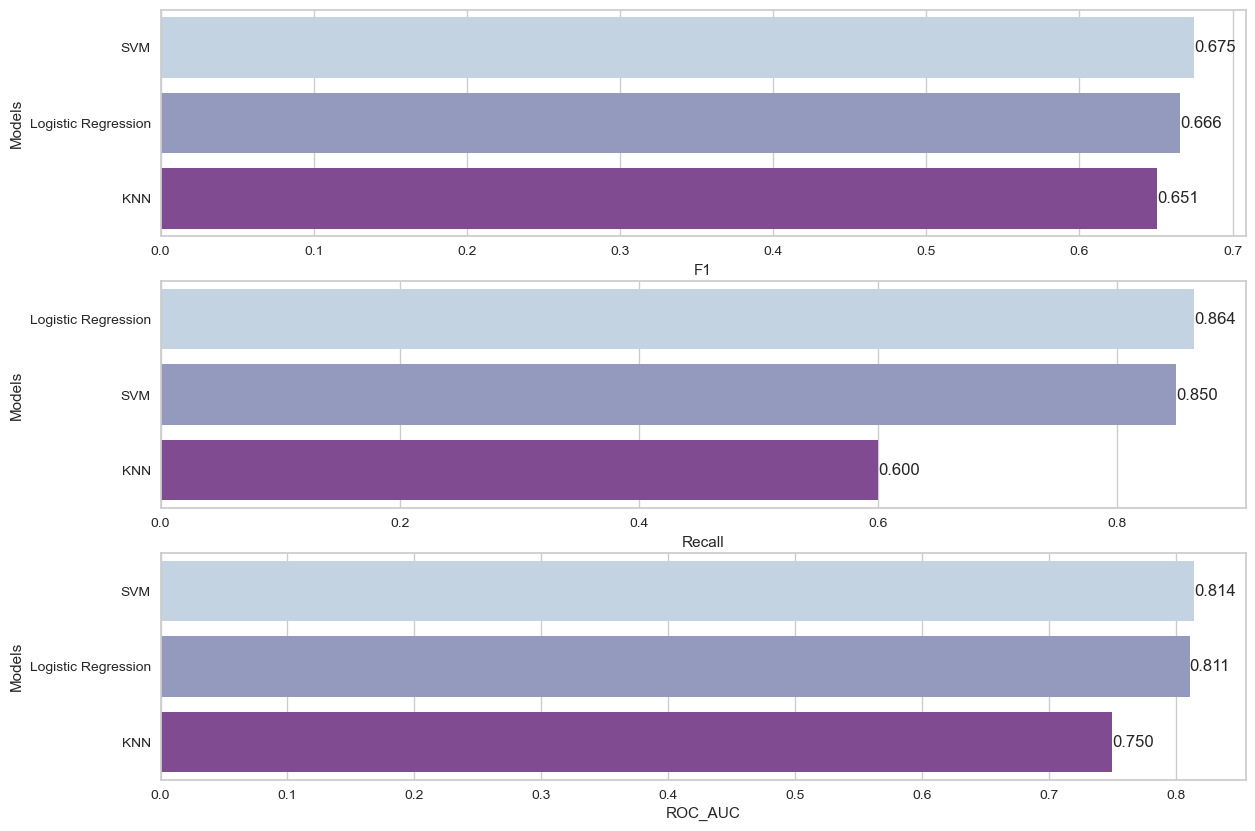

In [165]:
# F1 - Recall - ROC_AUC Scores

compare = pd.DataFrame({"Models": ["Logistic Regression","SVM", "KNN"],
                        "F1": [log_grid_f1,svm_grid_f1, knn_grid_f1],
                        "Recall": [log_grid_recall, svm_grid_recall, knn_recall],
                        "ROC_AUC": [log_grid_auc,svm_grid_auc, knn_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
     
    
plt.figure(figsize=(14,10))

plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Models", data=compare, palette="BuPu")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Models", data=compare, palette="BuPu")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Models", data=compare, palette="BuPu")
labels(ax)

plt.show()

<a id='final-model'></a>
## Final Model and Deployment

In [170]:
# SVM Model with the Best Parameters

model = Pipeline([("scaler", MinMaxScaler()), ("SVC", SVC(class_weight="balanced"))])


param_grid = {"SVC__C":[1],
             "SVC__gamma":["scale"],
             "SVC__kernel":["rbf"]}

cv = StratifiedKFold(n_splits = 5) # for unbalanced data

final_svm_model = GridSearchCV(model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall_macro",   
                          n_jobs = -1, # Uses all available cores
                          verbose=1,
                          return_train_score=True).fit(X_train, y_train) # fit the model

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [171]:
# Export the final model to your local -> serilarization

import pickle
pickle.dump(final_svm_model, open("final_classification_model", "wb"))

In [172]:
# Import the final model to use -> deserilization

new_model = pickle.load(open("final_classification_model", "rb"))
new_model

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('SVC', SVC(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'SVC__C': [1], 'SVC__gamma': ['scale'],
                         'SVC__kernel': ['rbf']},
             return_train_score=True, scoring='recall_macro', verbose=1)

<a id='conclusion'></a>
## Conclusion

---

**Final Model:** SVM Model

*Parameters:*
- recall: 85,  
- f1: 0.87   
- prc: 0.76  

---

In this project, we used logistic regression, SVM, and KNN models to predict income levels on an unbalanced dataset. We focused on F1 and recall scores to evaluate performance, as they are critical in **unbalanced datasets** where the minority class (higher income) is key.

### Why SVM was Chosen:
- **Balanced Performance**: The SVM model achieved a strong balance between precision and recall, with an F1 score of 0.87 and a recall of 0.85 on the test set. This makes it effective at identifying high-income individuals while keeping false positives low.
- **Consistency**: SVM showed stable performance across training and test sets, indicating good generalization without overfitting.

### Importance of F1 and Recall:
- **F1 Score**: This metric combines precision and recall, ensuring the model performs well with both false positives and false negatives in mind.
- **Recall**: Prioritizing recall ensures we capture most high-income individuals, which is vital in unbalanced datasets.

In short, the SVM model’s balanced precision and recall, along with its consistent performance, make it the best choice as the final model for predicting income levels.

<div style="text-align: center; font-weight: bold;">
 If you find this work helpful, don't forget to give it an 👍 UPVOTE! and join the discussion! 💬
</div>

<div style="color:white;
            display:fill;
            border-radius:10px;
            background-color:#0e2f52;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px;
            padding: 20px;
            text-align:center;
            font-weight: bold;">
    Thank you...
</div>

---

<div style="text-align: center;">
  <b>Duygu Jones | Data Scientist | 2024 </b>
    
  <br>
  Follow me:
  <a href="https://duygujones.vercel.app/">duygujones.com</a> | 
  <a href="https://www.linkedin.com/in/duygujones/">Linkedin</a> | 
  <a href="https://github.com/Duygu-Jones">GitHub</a> | 
  <a href="https://www.kaggle.com/duygujones">Kaggle</a> | 
  <a href="https://medium.com/@duygujones">Medium</a> | 
  <a href="https://public.tableau.com/app/profile/duygu.jones/vizzes">Tableau</a>

    
</div>    